# Introduction
# 1. Dataset Overview:
1.   The dataset used is insurance.csv, which contains information about medical insurance charges for individuals.
2.   It includes features such as age, sex, BMI (Body Mass Index), number of children, smoking status, region, and medical charges.

# 2. Objective:
1.   Perform *Exploratory Data Analysis(EDA)* to understand the relationships between various features and medical charges.
2.   Build *machine learning models* to predict medical charges based on the given features.

# 3. Key Features of the Code:
1.   *Data Loading and Inspection:* Load the dataset and inspect its structure, including missing values and descriptive statistics.
2.   *Data Visualization:* Use plots and graphs (e.g., histograms, boxplots, scatterplots) to visualize distributions, correlations, and trends in the data.
3.   *Feature Engineering:* Encode categorical variables (e.g., sex, smoker, region) for use in machine learning models.
4.   *Machine Learning Models:* Train and evaluate models such as Linear Regression and Random Forest Regressor to predict medical charges.
5.   *Business Insights:* Derive actionable insights from the data, such as identifying high-risk individuals or understanding the impact of smoking and BMI on medical charges.

# 4. Tools and Libraries Used :
1.   *Pandas:* For data manipulation and analysis.
2.   *NumPy:* For numerical computations.
3.   *Matplotlib and Seaborn:* For data visualization.
4.   *Scikit-learn:* For building and evaluating machine learning models.
5.   *LabelEncoder and StandardScaler:* For preprocessing categorical and numerical features.

# 5. Expected Outcomes:
1.   A comprehensive understanding of the dataset through EDA.
2.   Predictive models that can estimate medical charges based on individual attributes.
3.   Insights into factors influencing medical charges, which can inform decision-making in healthcare or insurance industries.


In [39]:
# 1. Import Libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [40]:
# 2. Load and Inspect the Dataset
# Load the dataset
df = pd.read_csv('/content/sample_data/insurance.csv')
# df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Replace infinite values with NaN (if any)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (optional: you can impute instead)
df.dropna(inplace=True)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Missing Values:
age         0
sex         

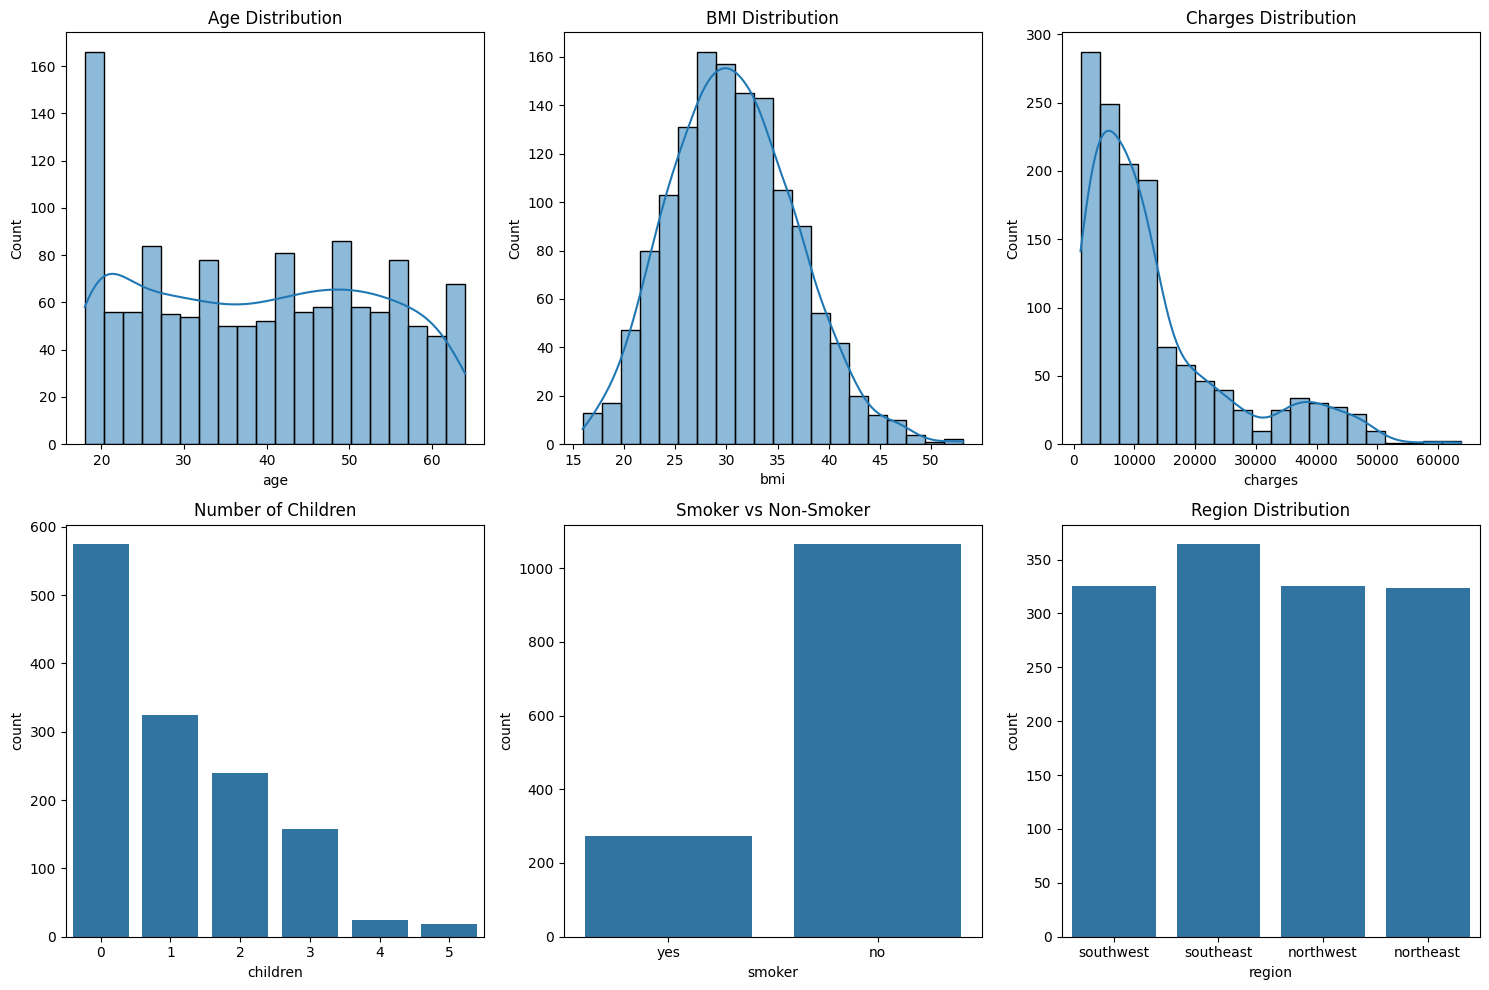

In [29]:
# 3. Exploratory Data Analysis (EDA)
# A. Distribution of Numerical Features
# Plot distributions of numerical features
plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 3, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')

# BMI distribution
plt.subplot(2, 3, 2)
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')

# Charges distribution
plt.subplot(2, 3, 3)
sns.histplot(df['charges'], bins=20, kde=True)
plt.title('Charges Distribution')

# Number of children
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='children')
plt.title('Number of Children')

# Smoker vs Non-Smoker
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='smoker')
plt.title('Smoker vs Non-Smoker')

# Region distribution
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='region')
plt.title('Region Distribution')

plt.tight_layout()
plt.show()


Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


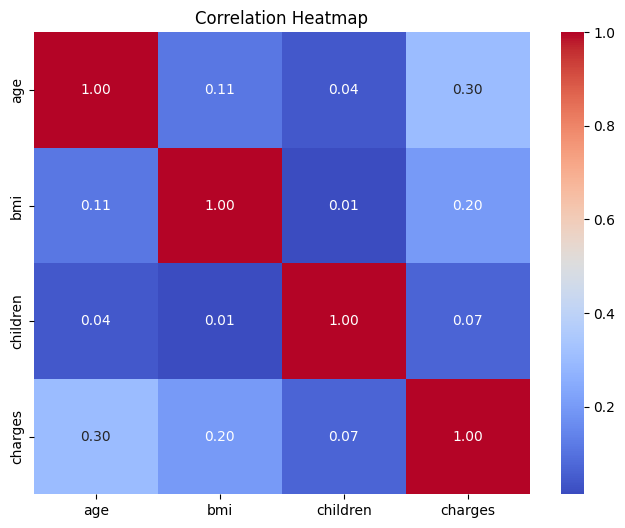

In [30]:
# B. Correlation Analysis
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


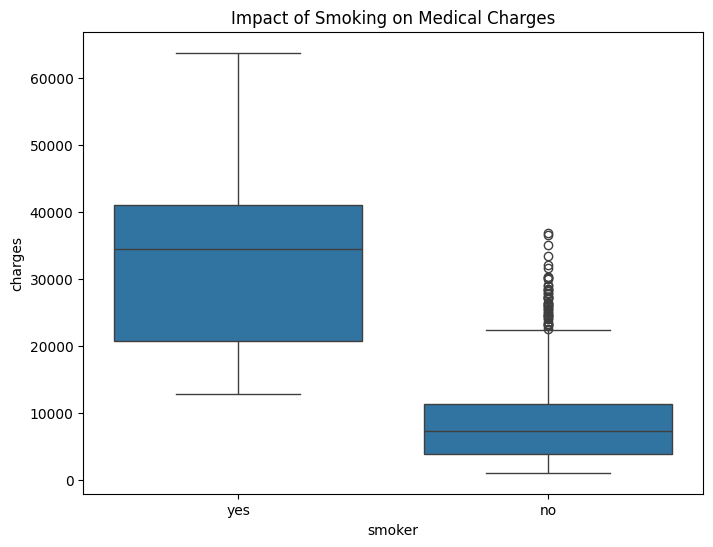

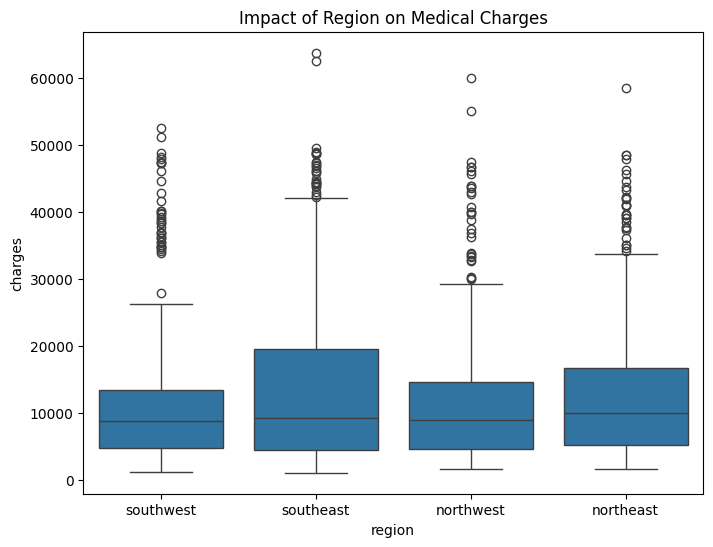

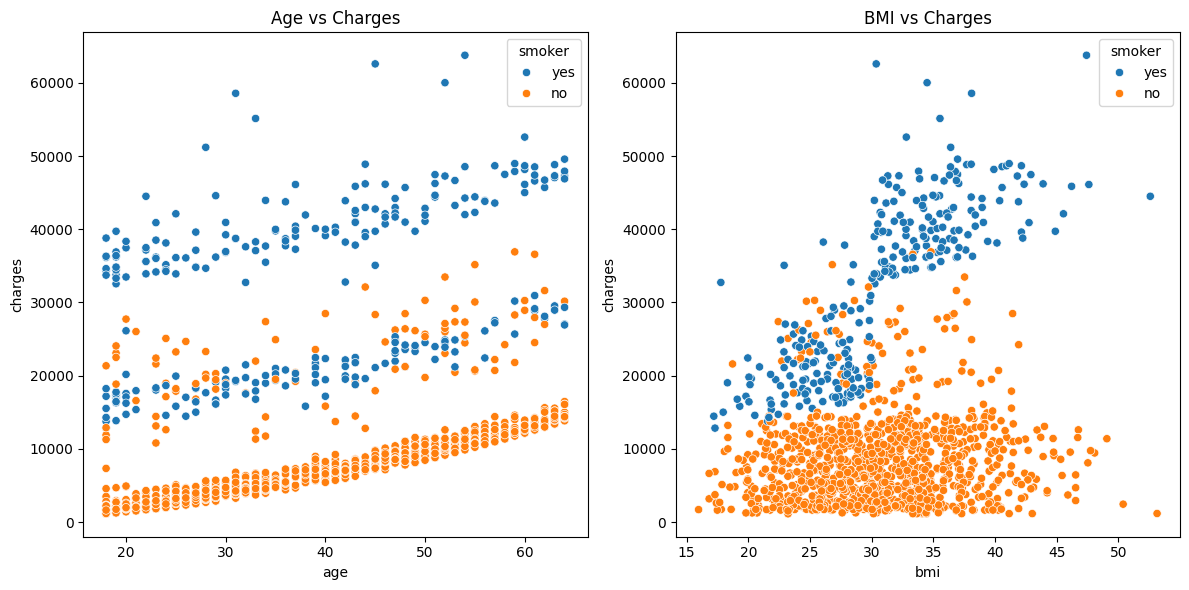

In [31]:
# C. Impact of Categorical Variables
# Impact of smoking on charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Impact of Smoking on Medical Charges')
plt.show()

# Impact of region on charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='region', y='charges')
plt.title('Impact of Region on Medical Charges')
plt.show()

# Scatter plots for age, bmi vs charges
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges')

plt.tight_layout()
plt.show()


In [32]:
# 4. Machine Learning Models
# A. Encode Categorical Variables
# Encode categorical variables
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [33]:
# B. Split Data into Training and Testing Sets
# Define features and target
X = df.drop(columns=['charges'])
y = df['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
# C. Train and Evaluate Linear Regression
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Performance:")
print(f"MSE: {mse_lr}, R2 Score: {r2_lr}")

# Feature importance from coefficients
feature_importances_lr = pd.Series(lr_model.coef_, index=X.columns)
print("\nFeature Importances from Linear Regression:")
print(feature_importances_lr.sort_values(ascending=False))



Linear Regression Performance:
MSE: 33635210.43117845, R2 Score: 0.7833463107364536

Feature Importances from Linear Regression:
smoker      9557.143383
age         3616.108652
bmi         2028.308579
children     516.662566
sex           -9.392954
region      -302.387980
dtype: float64


In [35]:
# D. Train and Evaluate Random Forest Regressor
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Performance:")
print(f"MSE: {mse_rf}, R2 Score: {r2_rf}")

# Feature importance from Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importances from Random Forest:")
print(feature_importances_rf.sort_values(ascending=False))



Random Forest Performance:
MSE: 20898625.73754565, R2 Score: 0.8653861739369313

Feature Importances from Random Forest:
smoker      0.608618
bmi         0.216291
age         0.134554
children    0.020199
region      0.013926
sex         0.006412
dtype: float64


In [36]:
# 5. Business Insights and Use Cases
# A. Customer Segmentation
# Segment customers based on their spending behavior:
# Create cost groups
df['cost_group'] = pd.qcut(df['charges'], q=2, labels=['Low', 'High'])
print("\nCustomer Segmentation by Cost Group:")
print(df['cost_group'].value_counts())


Customer Segmentation by Cost Group:
cost_group
Low     669
High    669
Name: count, dtype: int64


In [37]:
# B. Risk Assessment
# Identify high-risk individuals (e.g., smokers with high BMI):
high_risk = df[(df['smoker'] == 1) & (df['bmi'] > 30)]
print("\nHigh-Risk Individuals (Smokers with High BMI):")
print(high_risk[['age', 'sex', 'bmi', 'smoker', 'charges']])


High-Risk Individuals (Smokers with High BMI):
      age  sex     bmi  smoker      charges
14     27    1  42.130       1  39611.75770
19     30    1  35.300       1  36837.46700
23     34    0  31.920       1  37701.87680
29     31    1  36.300       1  38711.00000
30     22    1  35.600       1  35585.57600
...   ...  ...     ...     ...          ...
1300   45    1  30.360       1  62592.87309
1301   62    1  30.875       1  46718.16325
1308   25    0  30.200       1  33900.65300
1313   19    0  34.700       1  36397.57600
1323   42    0  40.370       1  43896.37630

[144 rows x 5 columns]


In [38]:
# C. Scenario Analysis
# Simulate an aging population and predict charges:
# Simulate aging population
df_simulated = df.copy()
df_simulated['age'] += 10

# Before scaling, drop the 'cost_group' column from the simulated data
df_simulated_scaled = scaler.transform(df_simulated.drop(columns=['charges', 'cost_group'])) # Drop 'cost_group' here
simulated_charges_lr = lr_model.predict(df_simulated_scaled)
df_simulated['predicted_charges_lr'] = simulated_charges_lr

print("\nSimulated Charges with Aging Population (Linear Regression):")
print(df_simulated[['age', 'charges', 'predicted_charges_lr']].head())


Simulated Charges with Aging Population (Linear Regression):
   age      charges  predicted_charges_lr
0   29  16884.92400          27710.293975
1   28   1725.55230           6454.041233
2   38   4449.46200           9616.235033
3   43  21984.47061           6440.655800
4   42   3866.85520           8257.050243
